# Práctica

* Análisis de regresión lineal múltiple mediante matrices que permitan construir un modelo predictivo a una base de datos real, de manera que puedas generar pronósticos adecuados.

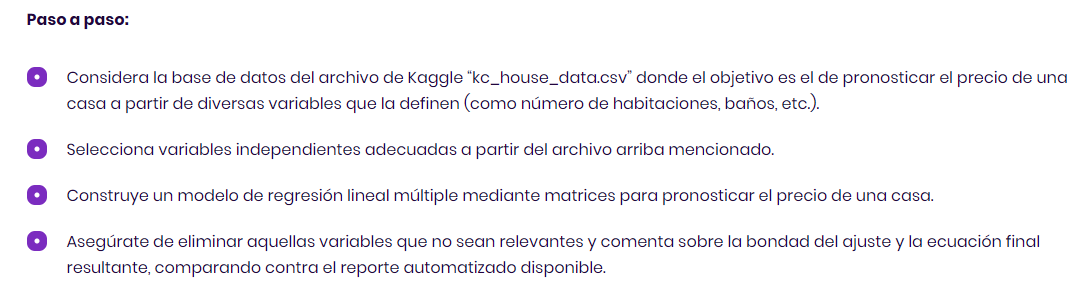

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M51 DS')
df = pd.read_csv('kc_house_data.csv')

In [46]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [48]:
# agregamos el el intercepto con valor de 1

df['Intercepto'] = 1

In [49]:
# revisamos las columnas y dejamos solo las que nos interesan para el analisis.

df = df[['price','bedrooms','bathrooms','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
print(df.shape)
df.head()

(21613, 11)


,price,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1.0,0,0,3,1680,0,1987,0


In [50]:
# asignamos columnas para X y Y

Xdata = df[['bedrooms','bathrooms','floors','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated']].values
Ydata = df[['price']].values

In [51]:
# dividimos las base en Trian y Test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size = 0.3, random_state= 1)

In [52]:
X = Xdata
Y = Ydata

In [53]:
# Opcion de formato numerico para no usar Notacion Cientifica para las matrices
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

* Vamos a calcular el Vector b 'Minimos Cuadrados'

In [54]:
# primero calculamos (X^t X)
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X

array([[264274.000000, 162054.750000, 110770.500000, 538.000000,
        18295.000000, 138241089.000000, 23933912.000000,
        143686638.000000, 6301162.000000],
       [162054.750000, 109476.812500, 72799.125000, 436.500000,
        13103.750000, 91186968.250000, 15414193.750000, 90334653.250000,
        4196944.250000],
       [110770.500000, 72799.125000, 54562.750000, 267.500000,
        7830.500000, 62821592.500000, 8145668.500000, 63824303.500000,
        2755610.000000],
       [538.000000, 436.500000, 267.500000, 163.000000, 614.000000,
        403106.000000, 114205.000000, 319837.000000, 83520.000000],
       [18295.000000, 13103.750000, 7830.500000, 614.000000,
        13878.000000, 11355647.000000, 3506158.000000, 9955173.000000,
        1118720.000000],
       [138241089.000000, 91186968.250000, 62821592.500000,
        403106.000000, 11355647.000000, 83945847344.000000,
        10856125974.000000, 76407090291.000000, 3429744682.000000],
       [23933912.000000, 15414193

In [55]:
# ahora obtenemos la inversa (X^t X)^-1
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv

array([[0.000084, -0.000022, 0.000011, 0.000030, 0.000009, -0.000000,
        -0.000000, -0.000000, 0.000000],
       [-0.000022, 0.000223, -0.000097, 0.000007, 0.000002, -0.000000,
        -0.000000, -0.000000, -0.000000],
       [0.000011, -0.000097, 0.000281, -0.000006, -0.000002, -0.000000,
        0.000000, -0.000000, -0.000000],
       [0.000030, 0.000007, -0.000006, 0.007418, -0.000336, -0.000000,
        0.000000, -0.000000, -0.000000],
       [0.000009, 0.000002, -0.000002, -0.000336, 0.000106, -0.000000,
        -0.000000, 0.000000, -0.000000],
       [-0.000000, -0.000000, -0.000000, -0.000000, -0.000000, 0.000000,
        0.000000, 0.000000, 0.000000],
       [-0.000000, -0.000000, 0.000000, 0.000000, -0.000000, 0.000000,
        0.000000, 0.000000, -0.000000],
       [-0.000000, -0.000000, -0.000000, -0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, -0.000000],
       [0.000000, -0.000000, -0.000000, -0.000000, -0.000000, 0.000000,
        -0.000000, -0.000000, 0.

In [56]:
# ahora calculamos X^t Y
XT_Y = np.matmul(np.matrix.transpose(X), Y)
XT_Y

array([[41623028485.000000],
       [27894385715.750000],
       [18543180450.500000],
       [270885792.000000],
       [5150643758.000000],
       [24854549271975.000000],
       [4539858275073.000000],
       [23019983014570.000000],
       [1388173928583.000000]])

In [57]:
# por ultimo calculamos 'b'   b = (X^t X)^-1 X^t Y
betas = np.matmul(XT_X_inv, XT_Y)
betas

array([[-41553.790986],
       [6176.747052],
       [15965.790244],
       [539684.939906],
       [71215.557914],
       [275.042410],
       [278.536953],
       [22.211812],
       [57.399629]])

 * Obtenemos la determinación de la Bondad de Ajuste

In [58]:
# Calculamos TSS (Suma Total de Cuadrados)  Y^t Y - nY^2 
TSS = np.matmul(np.matrix.transpose(Y), Y) - len(Y) * (Y.mean() **2)
TSS

array([[2912916761921300.000000]])

In [59]:
# Calculo de ESS (Suma Explicada de Cuadrados) (b^t X^t(X b) - nY^2)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X, betas)) - len(Y) * (Y.mean()**2)
ESS

array([[1638918668711331.000000]])

In [60]:
# Calculo de RSS (Residuales al cuadrado)
RSS = TSS - ESS
RSS

array([[1273998093209969.000000]])

* Calculo del coeficiente de Determinación de R Cuadrada

In [61]:
RSq = 1 -RSS / TSS
RSq

array([[0.562638]])

* Calculo de Coeficiente de Determinacion de R Cuadrada Ajustada

In [62]:
RSq_Aj = 1 -(RSS / (X.shape[0] - X.shape[1])) / (TSS / X.shape[0] -1)
RSq_Aj

array([[0.562456]])

* Reporte Automatizado de regresión en Python

In [63]:
import statsmodels.api as sm
regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          1.497e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                        0.00
Time:                        21:32:15   Log-Likelihood:                     -2.9867e+05
No. Observations:               21613   AIC:                                  5.974e+05
Df Residuals:                   21604   BIC:                                  5.974e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
# Aplicacion del modelo en Base de Prueba(Test)
Y_pred = np.matmul(X_test, betas)
Y_pred

array([[694494.418933],
       [398752.138576],
       [654474.313832],
       ...,
       [335206.882288],
       [2158408.658573],
       [945335.347565]])

In [65]:
# calculo de residuales

Resid = Y_test - Y_pred
Resid

array([[-235494.418933],
       [46247.861424],
       [402525.686168],
       ...,
       [-105206.882288],
       [-478408.658573],
       [-652335.347565]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

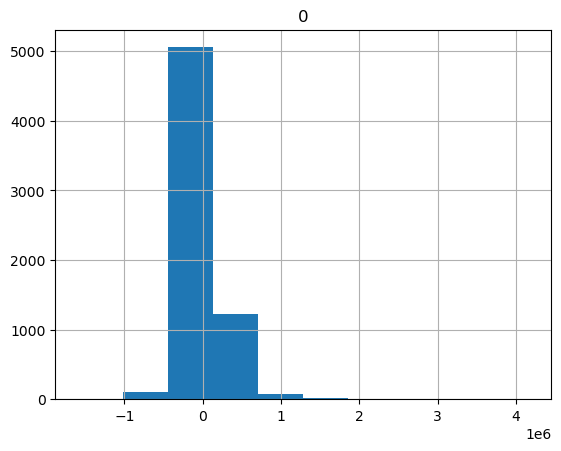

In [66]:
# Grafico del Histograma de Residuales para la Base de prueba
df = pd.DataFrame(Resid)
df.hist()

In [67]:
# Calculamos R2 Score
from sklearn.metrics import r2_score
from sklearn import metrics
print('Coeficiente R Cuadrada', r2_score(Y_test, Y_pred))

Coeficiente R Cuadrada 0.5731599968271357


## NOTA
  ** R² = 0.5731, significa que aproximadamente el 57.31% de la variación en el precio de las casas puede ser explicada por el modelo de regresión